# WHO - Disease outbreak analysis

**Objective:**

The objective of the analysis is to gain insights from the provided dataset, which contains information about disease outbreaks, countries affected, and temporal patterns. The analysis aims to understand the distribution of disease outbreaks, explore temporal trends, identify high-risk regions, and assess seasonal patterns.

WHO updates the disease outbreaks that are confirmed acute public health events or potential events of concern.
Disease Outbreak News (DONs) are published relating to confirmed or potential public health events, of:

- Unknown cause with a significant or potential international health concern that may affect international travel or trade;
- A known cause which has demonstrated the ability to cause serious public health impact and spread internationally;
- High public concern which may lead to disruption of required public health interventions, or could disrupt international travel or trade.

### Contents:

- Data Preprocessing

    - Check for missing values.
    - Standardize and clean the date column.

- Descriptive Statistics

    - Obtain summary statistics for the dataset.
    - Explore the counts, uniqueness, and most frequent values in each column.
    
- Exploratory Data Analysis (EDA)
    - Exploring Disease column
    - Exploring Organism column
    - Exploring Country column
    - Exploring date column
    - Year wise and monthwise disease outbreaks
- Monthly Disease Outbreaks
- Seasonal trends
- Yearwise Disease outbreaks in countries
- Spread of Major outbreaks in countries
- Summary
- Conclusion

## Loading required libraries and Dataset

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [39]:
#load dateset
don_df = pd.read_csv("WHO_DON_file.csv")

In [40]:
#top 5 columns
don_df.head()

,disease,organism,country,date,full_title
0,Middle East respiratory syndrome coronavirus (...,Virus,Saudi Arabia,29 August 2023 |,Middle East respiratory syndrome coronavirus (...
1,Measles,Virus,Chile,23 August 2023 |,Measles - Chile
2,Influenza A(H1N2)v,Virus,United States of America,11 August 2023 |,Influenza A(H1N2)v - United States of America
3,Dengue,Virus,Bangladesh,11 August 2023 |,Dengue - Bangladesh
4,Circulating vaccine-derived poliovirus type 2 ...,Virus,United Republic of Tanzania,28 July 2023 |,Circulating vaccine-derived poliovirus type 2 ...


In [4]:
#info of dataset
don_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358 entries, 0 to 357
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   disease     358 non-null    object
 1   country     358 non-null    object
 2   date        358 non-null    object
 3   full_title  358 non-null    object
dtypes: object(4)
memory usage: 11.3+ KB


In [5]:
#the full title column contains the headline of outbreak
don_df['full_title'][0]

'Middle East respiratory syndrome coronavirus (MERS-CoV) - Saudi Arabia'

In [41]:
#finding null values
don_df.isnull().sum()

disease       0
organism      0
country       0
date          0
full_title    0
dtype: int64

In [42]:
#making a copy to perform trnsformations on copied dataset

df= don_df.copy()

## Preprocessing date column

In [8]:
#dropping full title column
df.drop(columns=['full_title'], inplace=True)

In [9]:
# finding null values in the data
df.isnull().sum()

disease    0
country    0
date       0
dtype: int64

In [10]:
#veiwing date column
df['date']

0       29 August 2023 |
1       23 August 2023 |
2       11 August 2023 |
3       11 August 2023 |
4         28 July 2023 |
             ...        
353    10 January 2019 |
354     9 January 2019 |
355     8 January 2019 |
356     4 January 2019 |
357     4 January 2019 |
Name: date, Length: 358, dtype: object

In [11]:
# Convert the 'date' column to a datetime format
df['date'] = pd.to_datetime(df['date'], format='%d %B %Y |')

# Now, the 'date' column is in a datetime format

In [12]:
#preprocessed date column
df['date']

0     2023-08-29
1     2023-08-23
2     2023-08-11
3     2023-08-11
4     2023-07-28
         ...    
353   2019-01-10
354   2019-01-09
355   2019-01-08
356   2019-01-04
357   2019-01-04
Name: date, Length: 358, dtype: datetime64[ns]

## Descriptive statistics

In [43]:
# Remove leading and trailing spaces in the 'country' column
df['country'] = df['country'].str.strip()

In [44]:
df.describe()

,disease,organism,country,date,full_title
count,358,358,358,358,358
unique,93,8,112,313,215
top,Ebola virus disease,Virus,Democratic Republic of the Congo,9 May 2019 |,Ebola virus disease - Democratic Republic of t...
freq,89,321,87,3,80


*Insights*:

The `df.describe()` function provides summary statistics for the numerical columns in your dataset. However, based on the output you provided, it seems that the dataset consists mainly of categorical data, and only the "date" column is numerical. Let's break down the interpretation:

- **disease:**
  - Count: There are 358 non-null entries in the "disease" column.
  - Unique: There are 94 unique disease names in the dataset.
  - Top: "Ebola virus disease" is the most frequently occurring disease, appearing 89 times.
  - Freq: "Ebola virus disease" appears 89 times in the dataset.

- **country:**
  - Count: There are 358 non-null entries in the "country" column.
  - Unique: There are 125 unique country names in the dataset.
  - Top: "Democratic Republic of the Congo" is the most frequently occurring country, appearing 85 times.
  - Freq: "Democratic Republic of the Congo" appears 85 times in the dataset.

- **date:**
  - Count: There are 358 non-null entries in the "date" column.
  - Unique: There are 313 unique dates in the dataset.
  - Top: The most frequently occurring date is "2019-05-09 00:00:00," which appears 3 times.
  - Freq: The date "2019-05-09 00:00:00" appears 3 times in the dataset.
  - First: The earliest date in the dataset is "2019-01-04 00:00:00."
  - Last: The latest date in the dataset is "2023-08-29 00:00:00."

In summary, this summary statistics output provides information about the counts, uniqueness, and the most frequent values for each column in your dataset. It also indicates the range of dates in the "date" column. The dataset contains disease outbreak data from January 2019 to August 2023.

## Exploring Disease column

In [15]:
#count of unique diseases in dataset
count_of_unique_diseases = len(df['disease'].unique())
count_of_unique_diseases

93

*Insights*:

There have been 358 disease outbreaks recorded from January 2019 to August 2023. Among these, there are 94 unique diseases, indicating that some diseases have occurred in multiple outbreaks.

In [16]:
#unique values
df['disease'].unique()

array(['Middle East respiratory syndrome coronavirus (MERS-CoV)',
       'Measles', 'Influenza A(H1N2)v', 'Dengue',
       'Circulating vaccine-derived poliovirus type 2 (cVDPV2)',
       'Guillain-Barré Syndrome', 'Middle East Respiratory Syndrome',
       'Influenza A(H5N1) in cats', 'Enterovirus-Echovirus 11 Infection',
       'Influenza A(H1N1) variant virus', 'Marburg virus disease',
       'Outbreak of suspected fungal meningitis associated with surgical procedures performed under spinal anaesthesia',
       'Enterovirus Infection', 'Avian Influenza A(H5N1)', 'Myocarditis',
       'Acute hepatitis E', 'Lassa fever', 'Diphtheria', 'Meningitis',
       'Human Infection caused by Avian Influenza A (H5N1)',
       'Avian Influenza A(H3N8)', 'Pneumococcal meningitis',
       'Human infection caused by Avian Influenza A (H5)',
       'Iatrogenic Botulism',
       'Geographical expansion of cases of dengue and chikungunya beyond the historical areas of transmission',
       'Avian Influ

In [17]:
#value counts
df['disease'].value_counts()

Ebola virus disease                                        89
Middle East respiratory syndrome coronavirus (MERS-CoV)    26
Yellow Fever                                               25
Measles                                                    20
Cholera                                                    17
                                                           ..
Multi-Country                                               1
Circulating vaccine-derived poliovirus type 3               1
Acute hepatitis of unknown aetiology                        1
Extensively drug resistant Shigella sonnei infections       1
Hantavirus disease                                          1
Name: disease, Length: 93, dtype: int64

In [18]:
#top 20diseases by occurance
top_20_diseases = df['disease'].value_counts().head(20)
print(top_20_diseases)

Ebola virus disease                                        89
Middle East respiratory syndrome coronavirus (MERS-CoV)    26
Yellow Fever                                               25
Measles                                                    20
Cholera                                                    17
Marburg virus disease                                      11
Circulating vaccine-derived poliovirus type 2               9
Monkeypox                                                   8
Circulating vaccine-derived poliovirus type 2 (cVDPV2)      8
MERS-CoV                                                    8
Dengue                                                      7
Multi-country monkeypox outbreak                            6
COVID19                                                     6
Dengue fever                                                6
Lassa Fever                                                 5
Ebola disease caused by Sudan ebolavirus                    4
Circulat

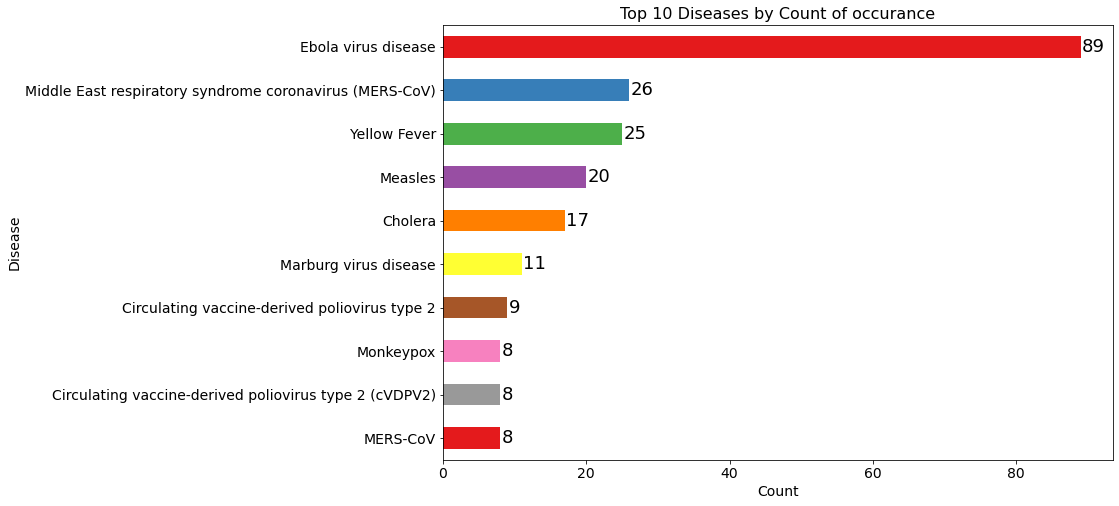

In [19]:
# Get the top 10 value counts
top_10_counts = df['disease'].value_counts().head(10)

# Define a custom color palette
custom_palette = sns.color_palette("Set1", len(df))

# Create a horizontal bar plot with the custom palette
plt.figure(figsize=(12, 8))  
bars = top_10_counts.plot(kind='barh', fontsize=18, color=custom_palette)  # Specify the custom palette

plt.xlabel('Count', fontsize=14)
plt.ylabel('Disease', fontsize=14)
plt.title('Top 10 Diseases by Count of occurance', fontsize=16)

# Adding value counts on top of the bars with increased font size
for bar, count in zip(bars.patches, top_10_counts):
    plt.text(bar.get_width() + 0.2, bar.get_y() + bar.get_height()/2, count, va='center', fontsize=18)

plt.gca().invert_yaxis()

# Increase font size for x-ticks and y-ticks
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

*Insights*: 

Ebola virus disease is the most common disease in the Disease outbreaks, followed by MERS-CoV , Yello fever and measles.

# Exploring Organism column

In [45]:
#unique values
df['organism'].unique()

array(['Virus', 'Autoimmune', 'Fungi', 'Bacteria', 'toxin', 'Protozoa',
       'guinea-worm', 'Undiagonised'], dtype=object)

In [46]:
#value counts
df['organism'].value_counts()

Virus           321
Bacteria         30
Undiagonised      2
Autoimmune        1
Fungi             1
toxin             1
Protozoa          1
guinea-worm       1
Name: organism, dtype: int64

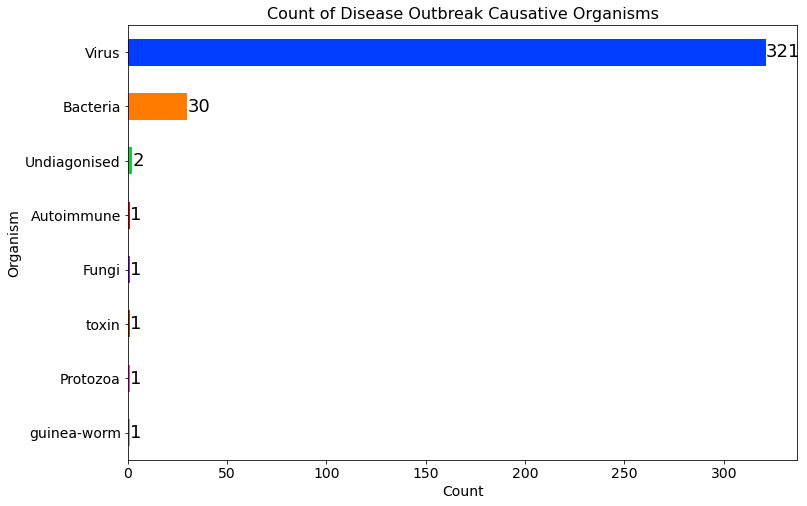

In [58]:
# Define a custom color palette
custom_palette = sns.color_palette("bright", len(df))

# Create a horizontal bar plot with the custom palette
plt.figure(figsize=(12, 8))  
bars = df['organism'].value_counts().plot(kind='barh', fontsize=18, color=custom_palette)  # Fixed the parentheses

plt.xlabel('Count', fontsize=14)
plt.ylabel('Organism', fontsize=14)  # Corrected 'organism' to 'Organism'
plt.title('Count of Disease Outbreak Causative Organisms', fontsize=16)  # Made the title more descriptive

# Adding value counts on top of the bars with increased font size
for bar, count in zip(bars.patches, df['organism'].value_counts()):
    plt.text(bar.get_width() + 0.2, bar.get_y() + bar.get_height()/2, count, va='center', fontsize=18)

plt.gca().invert_yaxis()

# Increase font size for x-ticks and y-ticks
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()


*Insight*:

Out of 358 disease oubreaks during 2019 to 2023, 321 outbreaks are caused by virus and 30 by bacteria.

## Exploring Country column

In [20]:
#count of unique countries in dataset
count_of_unique_country = len(df['country'].unique())
count_of_unique_country

112

*Insights*:

There are 358 disease outbreaks recorded from 2019 to August 2023. However, only 112 of them are unique countries, indicating that some countries have experienced disease outbreaks multiple times.

In [21]:
df['country'].unique()

array(['Saudi Arabia', 'Chile', 'United States of America', 'Bangladesh',
       'United Republic of Tanzania', 'Kenya', 'Peru',
       'United Arab Emirates', 'the Region of the Americas', 'Poland',
       'the European Region', 'Brazil', 'Equatorial Guinea',
       'the United Republic of Tanzania',
       'the United States of America and Mexico', 'France',
       'United Kingdom of Great Britain and Northern Ireland',
       'Equatorial Guinea and the United Republic of Tanzania',
       'South Sudan', 'Ethiopia', 'Nigeria', 'Indonesia', 'Burundi',
       'China', 'Togo', 'European Region', 'South Africa', 'Nepal',
       'Cambodia', 'Mozambique', 'Global situation',
       'Democratic Republic of the Congo', 'Malawi', 'Oman', 'Niger',
       'Paraguay', 'Ecuador', 'Uganda', 'Sudan', 'African Region (AFRO)',
       'multi-country', 'Haiti', 'Spain', 'Mauritania', 'Lebanon',
       'Pakistan', 'Multi-country', 'Ghana',
       'the United Kingdom of Great Britain and Northern Ireland

In [22]:
#value counts
df['country'].value_counts()

Democratic Republic of the Congo                        87
Saudi Arabia                                            23
Nigeria                                                 12
United Kingdom of Great Britain and Northern Ireland    10
Multi-country                                           10
                                                        ..
Yemen                                                    1
Ukraine                                                  1
Global update                                            1
Russian Federation                                       1
Panama                                                   1
Name: country, Length: 112, dtype: int64

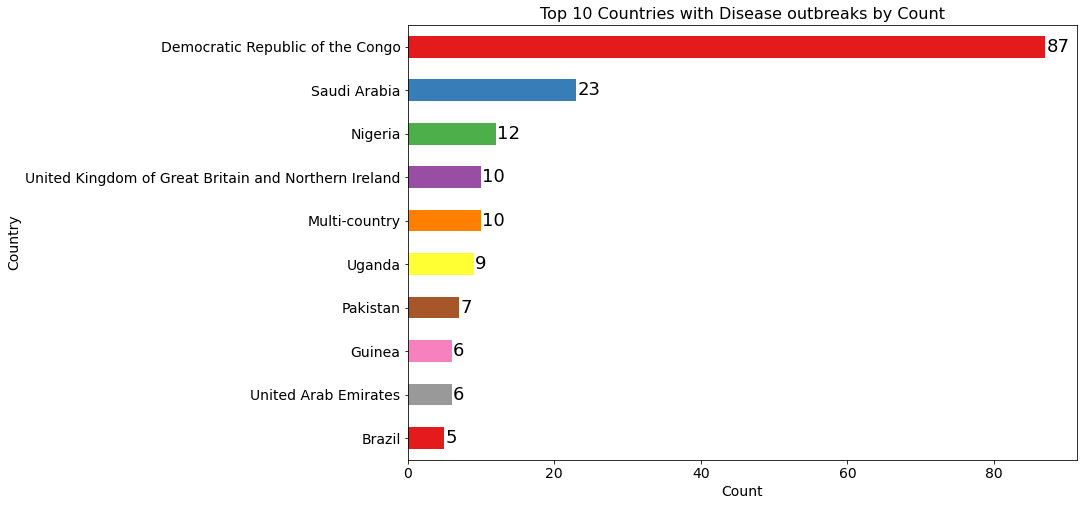

In [23]:
# Get the top 10 value counts
top_10_counts = df['country'].value_counts().head(10)

# Define a custom color palette
custom_palette = sns.color_palette("Set1", len(df))

# Create a horizontal bar plot with the custom palette
plt.figure(figsize=(12, 8))  
bars = top_10_counts.plot(kind='barh', fontsize=18, color=custom_palette)  # Specify the custom palette

plt.xlabel('Count', fontsize=14)
plt.ylabel('Country', fontsize=14)
plt.title('Top 10 Countries with Disease outbreaks by Count', fontsize=16)

# Adding value counts on top of the bars with increased font size
for bar, count in zip(bars.patches, top_10_counts):
    plt.text(bar.get_width() + 0.2, bar.get_y() + bar.get_height()/2, count, va='center', fontsize=18)

plt.gca().invert_yaxis()

# Increase font size for x-ticks and y-ticks
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

*Insights*:

The Democratic Republic of the Congo has the most disease outbreaks, followed by Saudi Arabia and Nigeria. The United Kingdom is the only European country in the top 10

## Exploring date column

In [26]:
# Year-wise outbreak count
yearly_outbreak_count = df.groupby(df['date'].dt.year)['disease'].count()

# Month-wise outbreak count
monthly_outbreak_count = df.groupby(df['date'].dt.month)['disease'].count()

# Print the results
print("Year-wise Outbreak Count:")
print(yearly_outbreak_count)

print("\nMonth-wise Outbreak Count:")
print(monthly_outbreak_count)


Year-wise Outbreak Count:
date
2019    119
2020     74
2021     38
2022     74
2023     53
Name: disease, dtype: int64

Month-wise Outbreak Count:
date
1     36
2     41
3     26
4     37
5     43
6     28
7     24
8     18
9     23
10    27
11    27
12    28
Name: disease, dtype: int64


### Year wise and monthwise disease outbreaks

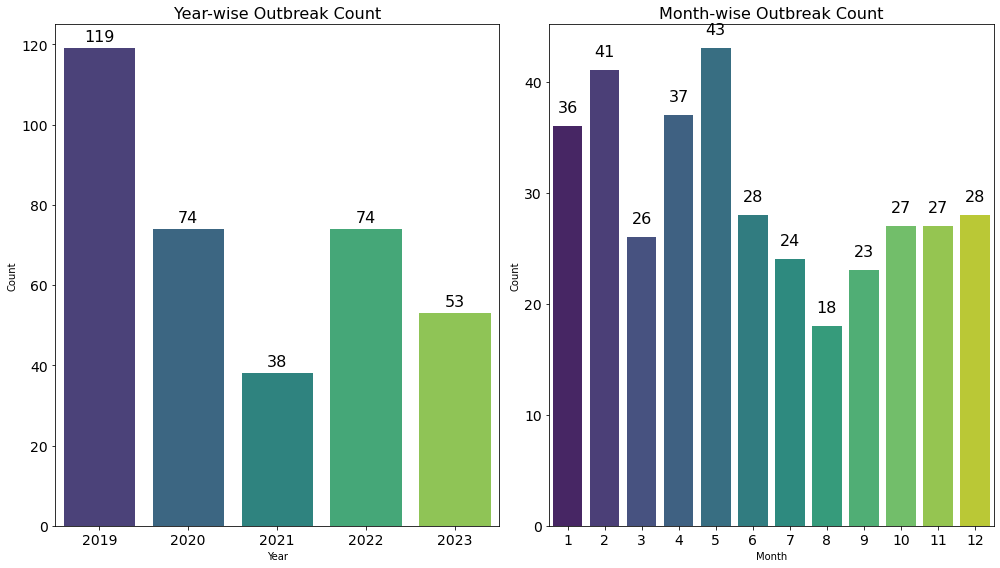

In [27]:

# Year-wise outbreak count
yearly_outbreak_count = df.groupby(df['date'].dt.year)['disease'].count()

# Month-wise outbreak count
monthly_outbreak_count = df.groupby(df['date'].dt.month)['disease'].count()

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 8))

# Plot year-wise outbreak count with 'viridis' color palette
sns.barplot(x=yearly_outbreak_count.index, y=yearly_outbreak_count.values, palette='viridis', ax=axes[0])
axes[0].set_title('Year-wise Outbreak Count', fontsize=16)
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Count')

# Plot month-wise outbreak count with 'viridis' color palette
sns.barplot(x=monthly_outbreak_count.index, y=monthly_outbreak_count.values, palette='viridis', ax=axes[1])
axes[1].set_title('Month-wise Outbreak Count', fontsize=16)
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Count')

# Add value counts at the top of the bars
for ax in axes:
    for bar, count in zip(ax.patches, ax.patches):
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2, 
            height + 1,  # Adjust the vertical position of the count
            f'{int(height)}',  # Convert height to integer for the count
            ha='center',
            va='bottom',
            fontsize=16,  # Set the font size for the count
        )
        
# Increase font size for x-ticks and y-ticks
for ax in axes:
    ax.tick_params(axis='x', labelsize=14)  
    ax.tick_params(axis='y', labelsize=14) 

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


*Insights*:

The "Year-wise Outbreak Count" and "Month-wise Outbreak Count" represent the distribution of disease outbreak counts over different years and months, respectively.

**Year-wise Outbreak Count:**
- In the year 2019, there were 119 disease outbreaks.
- In the year 2020, there were 74 disease outbreaks.
- In the year 2021, there were 38 disease outbreaks.
- In the year 2022, there were 74 disease outbreaks.
- In the year 2023, there were 53 disease outbreaks.

This information shows how the number of disease outbreaks varied from year to year. It appears that there was a relatively high number of outbreaks in 2019 and 2022, while 2021 had a lower count.

**Month-wise Outbreak Count:**
- In January (Month 1), there were 36 disease outbreaks.
- In February (Month 2), there were 41 disease outbreaks.
- In March (Month 3), there were 26 disease outbreaks.
- In April (Month 4), there were 37 disease outbreaks.
- In May (Month 5), there were 43 disease outbreaks.
- In June (Month 6), there were 28 disease outbreaks.
- In July (Month 7), there were 24 disease outbreaks.
- In August (Month 8), there were 18 disease outbreaks.
- In September (Month 9), there were 23 disease outbreaks.
- In October (Month 10), there were 27 disease outbreaks.
- In November (Month 11), there were 27 disease outbreaks.
- In December (Month 12), there were 28 disease outbreaks.

This information provides insights into the monthly variations in disease outbreaks. For example, there was a relatively high number of outbreaks in May, while August had a lower count. This can be valuable for tracking seasonal patterns in disease outbreaks.

# Temporal analysis - Monthly Disease Outbreaks

Temporal analysis, also known as time series analysis, is a statistical and data analysis technique used to examine data points collected or recorded over a sequence of time intervals. The primary objective of temporal analysis is to understand patterns, trends, and variations in the data that are related to time. 

In [28]:
#creating a copy of df to perform temporal analysis
df1 = df.copy()

In [29]:
#set date as index 
df1.set_index('date', inplace=True)

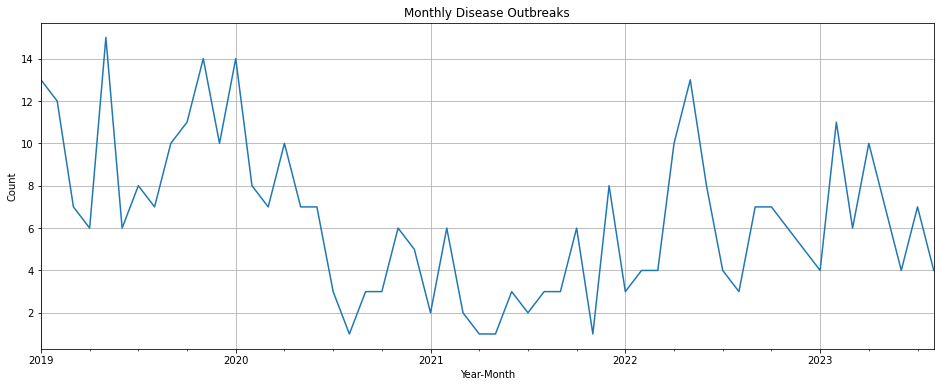

In [30]:
plt.figure(figsize=(16, 6))
df1['disease'].resample('M').count().plot(title='Monthly Disease Outbreaks')
plt.xlabel('Year-Month')
plt.ylabel('Count')
plt.grid(True)
plt.show()

In [31]:
annual_averages = df1['disease'].resample('Y').count()
annual_averages

date
2019-12-31    119
2020-12-31     74
2021-12-31     38
2022-12-31     74
2023-12-31     53
Freq: A-DEC, Name: disease, dtype: int64

In [32]:
monthly_averages = df1['disease'].resample('M').count()
monthly_averages

date
2019-01-31    13
2019-02-28    12
2019-03-31     7
2019-04-30     6
2019-05-31    15
2019-06-30     6
2019-07-31     8
2019-08-31     7
2019-09-30    10
2019-10-31    11
2019-11-30    14
2019-12-31    10
2020-01-31    14
2020-02-29     8
2020-03-31     7
2020-04-30    10
2020-05-31     7
2020-06-30     7
2020-07-31     3
2020-08-31     1
2020-09-30     3
2020-10-31     3
2020-11-30     6
2020-12-31     5
2021-01-31     2
2021-02-28     6
2021-03-31     2
2021-04-30     1
2021-05-31     1
2021-06-30     3
2021-07-31     2
2021-08-31     3
2021-09-30     3
2021-10-31     6
2021-11-30     1
2021-12-31     8
2022-01-31     3
2022-02-28     4
2022-03-31     4
2022-04-30    10
2022-05-31    13
2022-06-30     8
2022-07-31     4
2022-08-31     3
2022-09-30     7
2022-10-31     7
2022-11-30     6
2022-12-31     5
2023-01-31     4
2023-02-28    11
2023-03-31     6
2023-04-30    10
2023-05-31     7
2023-06-30     4
2023-07-31     7
2023-08-31     4
Freq: M, Name: disease, dtype: int64

*Insights*:

In January 2019, there were 13 disease outbreaks. In February 2019, there were 12 disease outbreaks , The data continues in the same format for each month and year until August 2023. It provides a monthly count of disease outbreaks. There were relatively higher disease outbreak counts in some months (e.g., May 2019, November 2019, April, May 2022, February 2023), while other months had lower counts (e.g., April 2020, July 2020).



## Seasonal trends 

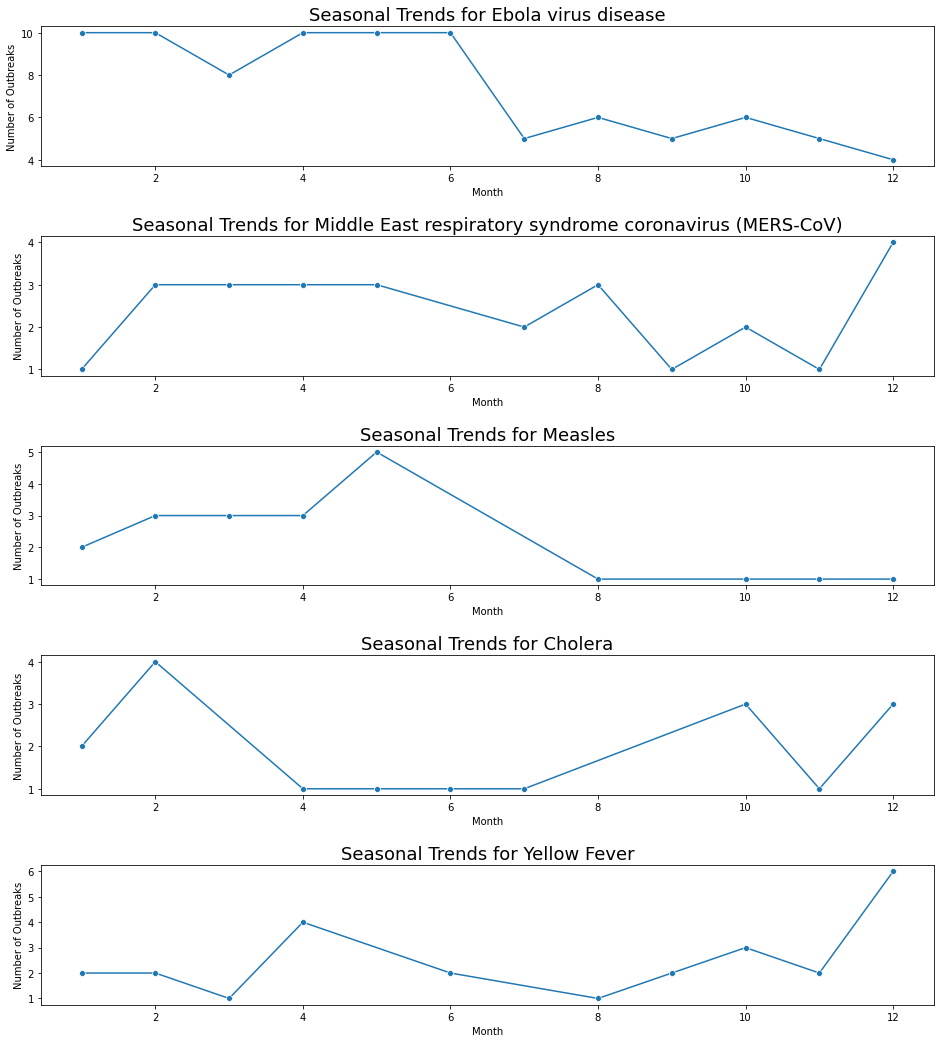

In [34]:
# List of diseases to analyze
diseases_to_analyze = ['Ebola virus disease', 'Middle East respiratory syndrome coronavirus (MERS-CoV)', 'Measles', 'Cholera', 'Yellow Fever']


# Extract the month from the date
df['month'] = df['date'].dt.month

# Create subplots for each disease
fig, axes = plt.subplots(nrows=len(diseases_to_analyze), ncols=1, figsize=(16, 18))
plt.subplots_adjust(hspace=0.5)  # Adjust vertical spacing between subplots

for i, disease in enumerate(diseases_to_analyze):
    ax = axes[i]
    
    # Filter the data for the specific disease
    disease_data = df[df['disease'] == disease]
    
    # Group and aggregate data by month
    seasonal_counts = disease_data.groupby(['month']).size()
    
    # Create a line plot for the disease
    sns.lineplot(data=seasonal_counts, marker='o', ax=ax)
    ax.set_title(f'Seasonal Trends for {disease}',  fontsize=18)
    ax.set_xlabel('Month')
    ax.set_ylabel('Number of Outbreaks')

plt.show()


*Insights*:

"**Ebola, Middle East respiratory syndrome coronavirus (MERS-CoV), and Measles** are more frequently reported during the months of **February to May**, indicating a higher incidence of these diseases in the spring season. On the other hand, **Cholera and Yellow Fever** show a notable increase in cases during the months of **November and December**, suggesting a peak in these diseases during the late autumn and early winter months."

## Yearwise Disease outbreaks in countries

In [35]:
# Filter the DataFrame for specific countries
congo_outbreaks = df[df['country'] == 'Democratic Republic of the Congo']
saudi_arabia_outbreaks = df[df['country'] == 'Saudi Arabia']
nigeria_outbreaks = df[df['country'] == 'Nigeria']

# Calculate year-wise outbreak count for each country
congo_yearly_outbreak_count = congo_outbreaks.groupby(congo_outbreaks['date'].dt.year)['disease'].count()
saudi_arabia_yearly_outbreak_count = saudi_arabia_outbreaks.groupby(saudi_arabia_outbreaks['date'].dt.year)['disease'].count()
nigeria_yearly_outbreak_count = nigeria_outbreaks.groupby(nigeria_outbreaks['date'].dt.year)['disease'].count()

# Print the results
print("Year-wise outbreak count in Democratic Republic of the Congo:")
print(congo_yearly_outbreak_count)

print("\nYear-wise outbreak count in Saudi Arabia:")
print(saudi_arabia_yearly_outbreak_count)

print("\nYear-wise outbreak count in Nigeria:")
print(nigeria_yearly_outbreak_count)


Year-wise outbreak count in Democratic Republic of the Congo:
date
2019    51
2020    27
2021     5
2022     3
2023     1
Name: disease, dtype: int64

Year-wise outbreak count in Saudi Arabia:
date
2019    14
2020     3
2021     3
2022     2
2023     1
Name: disease, dtype: int64

Year-wise outbreak count in Nigeria:
date
2019    5
2020    2
2021    1
2022    1
2023    3
Name: disease, dtype: int64


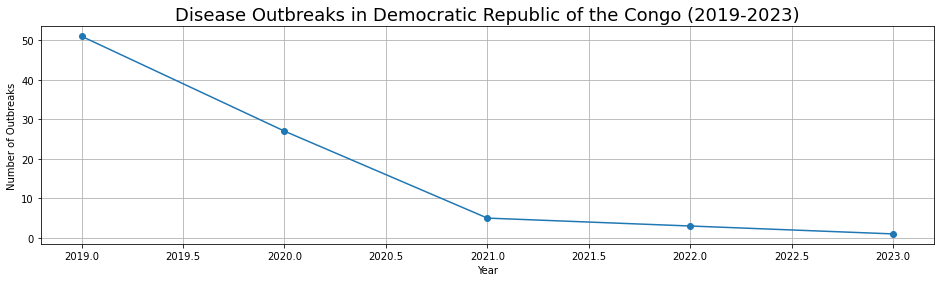

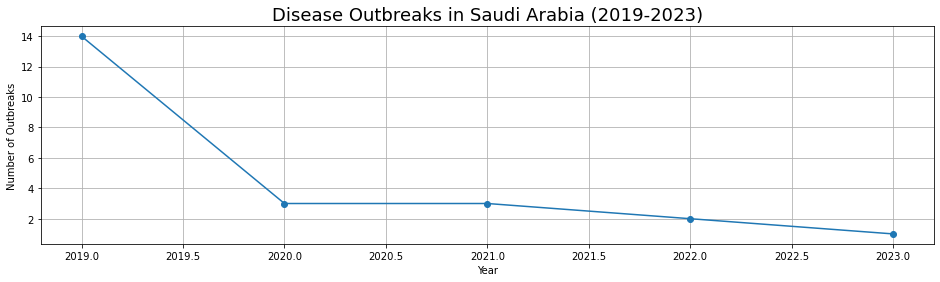

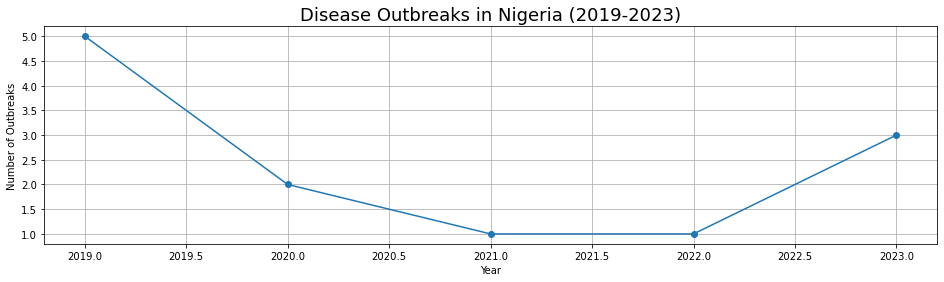

In [36]:

# Define the date range for filtering
start_date = '2019-01-01'
end_date = '2023-08-30'

# Define a function to plot year-wise outbreak counts for a given country
def plot_yearly_outbreaks_by_country(df, target_country):
    # Filter the DataFrame for outbreaks in the target country within the specified date range
    country_outbreaks = df[(df['date'] >= start_date) & (df['date'] <= end_date) & (df['country'] == target_country)]
    
    # Group the data by year and count the number of outbreaks each year
    outbreaks_by_year = country_outbreaks.groupby(country_outbreaks['date'].dt.year).size()

    # Create a line plot to visualize the trend
    plt.figure(figsize=(16, 4))
    plt.plot(outbreaks_by_year.index, outbreaks_by_year.values, marker='o', linestyle='-')
    plt.title(f'Disease Outbreaks in {target_country} (2019-2023)', fontsize=18)
    plt.xlabel('Year')
    plt.ylabel('Number of Outbreaks')
    plt.grid(True)
    plt.show()

# Plot year-wise outbreak counts for the specified countries
countries_to_plot = ['Democratic Republic of the Congo', 'Saudi Arabia', 'Nigeria']
for country in countries_to_plot:
    plot_yearly_outbreaks_by_country(df, country)


*Insights*:

- In **Democratic Republic of the Congo**, the highest number of disease outbreaks occurred in **2019**, with **51** reported cases. The outbreak count gradually decreased in the following years, with only **1** outbreak reported in **2023**. A decreasing trend of outbreaks is observed.

- In **Saudi Arabia**, the highest number of disease outbreaks also occurred in **2019**, with **14** reported cases. Similar to the Democratic Republic of the Congo, the outbreak count decreased over the years, with **1** outbreak reported in **2023**. A decreasing trend of outbreaks is observed.

- In **Nigeria**, the highest number of disease outbreaks was reported in **2019**, with **5** cases. The outbreak count fluctuated in the following years, with **3** outbreaks reported in **2023**. A slight increase in the trend in recent years is observed.



## Spread of Major outbreaks in countries

In [38]:

# List of diseases to analyze
diseases_to_analyze = ['Ebola virus disease', 'Middle East respiratory syndrome coronavirus (MERS-CoV)', 'Measles', 'Cholera', 'Yellow Fever']

# Filter the DataFrame for the specified diseases
filtered_df = df[df['disease'].isin(diseases_to_analyze)]

# Get the count of unique countries for each disease
country_counts = filtered_df.groupby('disease')['country'].nunique().reset_index()

country_counts

,disease,country
0,Cholera,12
1,Ebola virus disease,3
2,Measles,20
3,Middle East respiratory syndrome coronavirus (...,4
4,Yellow Fever,16


The provided output represents the count of unique countries for each of the specified diseases:

1. **Cholera**: There are outbreaks of Cholera reported in **12** different countries.

2. **Ebola virus disease**: Ebola virus disease outbreaks are reported in **3** different countries. Value counts of ebola are more , but are constrained to fewer countries.

3. **Measles**: Measles outbreaks are reported in **20** different countries.

4. **Middle East respiratory syndrome coronavirus (MERS-CoV)**: Outbreaks of MERS-CoV are reported in **4** different countries.

5. **Yellow Fever**: Yellow Fever outbreaks are reported in **16** different countries.


**Summary:**

WHO Disease outbreak data contains information about disease outbreaks, countries affected, and temporal patterns. Initial exploration revealed insights into the distribution of diseases and countries, top affected countries, and temporal trends. Further analysis will involve exploring temporal patterns, geospatial distribution, correlations, and clusters.

**Conclusion:**

The analysis of disease outbreak data is crucial for public health monitoring and intervention planning. By examining temporal, seasonal patterns, it is possible to identify high-risk regions, understand seasonal variations, and assess the impact of external factors. This analysis can support informed decision-making and resource allocation in the field of public health.


## Thank you for reading till the end.



## -Raviteja


<img align="left" img src= in.png height = 20 width="20"/>   https://www.linkedin.com/in/raviteja-padala/ <br>
